# 🥱 LangGraph 記憶篇 - MongoDB 保存狀態

❤️ Created by [hengshiousheu](https://huggingface.co/Heng666).

# 階段ㄧ、建立假資料

## 建築工地安全監控系統：數據背景說明

## 概述
位於台北市的「新北科技園區」正在進行一項大型建設專案，預計在三年內完成一座現代化的科技園區。為了確保工程進行期間的安全，專案管理團隊引入了一套先進的安全監控系統。
這套系統整合了多種技術，包括：

分佈在工地各處的高清攝影機
智能識別軟體
即時通報機制

系統的主要目標是預防事故發生，並在發生異常情況時能夠迅速反應。

## 數據欄位說明

1. **事件ID**: 唯一識別每個安全事件的編號，格式為 "INCxxxx"。
2. **日期時間**: 事件發生的具體日期和時間，格式為 "YYYY-MM-DD HH:MM:SS"。
3. **事件類型**: 描述發生的安全事件類型，例如：跌倒、設備故障、物體掉落等。
4. **嚴重程度**: 表示事件的嚴重程度，分為：輕微、中等、嚴重、危急。
5. **地點**: 事件發生的具體位置，包括區域和子區域，例如："主建築區-3區"。
6. **涉及人員**: 事件中主要涉及的人員姓名。
7. **人員角色**: 涉及人員在工地的職務角色，如：施工人員、工程師、安全主管等。
8. **攝影機ID**: 記錄事件的攝影機編號，格式為 "CAMxxx"。
9. **攝影機類型**: 描述使用的攝影機類型，如：固定式攝影機、球型攝影機、熱感應攝影機。
10. **異常事件類型**: 如果適用，描述與事件相關的具體異常行為，如：未佩戴安全裝備、進入危險區域等。
11. **處理人員**: 負責處理或報告該事件的人員姓名。
12. **影片來源**: 記錄事件的視頻文件存儲位置，格式為 "/video_storage/YYYY/MM/DD/CAMxxx_YYYYMMDD_HHMMSS.mp4"。

## 數據解讀示例

以下是一個數據條目的示例及其解讀：

```
事件ID: INC0001
日期時間: 2024-02-24 15:32:35
事件類型: 火災
嚴重程度: 危急
地點: 機械操作區-3區
涉及人員: 曹彥廷
人員角色: 工程師
攝影機ID: CAM009
攝影機類型: 熱感應攝影機
異常事件類型: 違規操作
處理人員: 曹彥廷
影片來源: /video_storage/2024/02/24/CAM009_20240224_153235.mp4
```

**解讀**：
2024年2月24日下午3點32分，在機械操作區-3區發生了一起嚴重的火災事件。涉及人員是工程師曹彥廷，可能由於違規操作引發。事件被 CAM009 號熱感應攝影機記錄，處理人員同樣是曹彥廷。相關的視頻證據存儲在指定的位置。

## 使用建議

1. 利用 "事件ID" 和 "日期時間" 可以追蹤事件的時間順序和頻率。
2. 分析 "事件類型" 和 "嚴重程度" 可以識別工地上最常見和最危險的安全問題。
3. 結合 "地點" 信息可以找出工地中最容易發生事故的區域。
4. 通過 "涉及人員" 和 "人員角色" 可以評估不同崗位的安全風險。
5. "異常事件類型" 有助於識別需要加強的安全培訓領域。
6. "影片來源" 提供了事件的視覺證據，可用於詳細分析和培訓目的。

通過仔細分析這些數據，可以制定有針對性的安全改進措施，提高工地整體安全水平。

## 方法一、直接下載準備好的資料

如果你懶得下載，已經備妥一份在 Gist 上，執行以下指令就可以進行操作

### 步驟ㄧ、下載 Gist 上 csv 檔案

In [1]:
import os

# 定義 Gist URL 和保存檔案的變數名稱
gist_url = "https://gist.githubusercontent.com/Heng-xiu/5a9404f2bf95e38dff5961e1462da863/raw/2ad120cdab91aca842f2f23bfcb64ff63b0d21f2/%25E6%2595%25B4%25E5%2590%2588%25E5%25BC%258F%25E5%25B7%25A5%25E5%259C%25B0%25E5%25AE%2589%25E5%2585%25A8%25E6%2595%25B8%25E6%2593%259A.csv"
save_as = "整合式工地安全數據.csv"

# 使用 curl 命令下載並保存文件
os.system(f"curl -o {save_as} {gist_url}")

0

### 步驟二、查看資訊

In [2]:
import pandas as pd

df = pd.read_csv('整合式工地安全數據.csv')

df.head(25)

,事件ID,日期時間,違規事件類型,嚴重程度,地點,違規人員,違規人員角色,攝影機ID,攝影機類型,違反職安條款,檢驗人員,影片存放位置
0,INC0001,2023-09-11 02:53:27,跌倒,嚴重,機械操作區-4區,盧雅惠,工程師,CAM005,球型攝影機,違規操作,王雅筑,/video_storage/2023/09/11/CAM005_20230911_0253...
1,INC0002,2023-09-11 03:23:27,物體掉落,中等,機械操作區-4區,黃志偉,安全主管,CAM001,固定式攝影機,未佩戴安全裝備,陶美玲,/video_storage/2023/09/11/CAM001_20230911_0323...
2,INC0003,2023-09-11 03:53:27,跌倒,中等,主建築區-9區,孫俊宏,訪客,CAM005,固定式攝影機,違規操作,王家瑜,/video_storage/2023/09/11/CAM005_20230911_0353...
3,INC0004,2023-09-11 04:23:27,觸電,嚴重,主建築區-9區,李雅玲,訪客,CAM007,熱感應攝影機,可疑人員活動,湯雅芳,/video_storage/2023/09/11/CAM007_20230911_0423...
4,INC0005,2023-09-11 04:53:27,火災,中等,材料堆放區-8區,王家瑜,安全主管,CAM010,球型攝影機,安全通道堵塞,鮑雅玲,/video_storage/2023/09/11/CAM010_20230911_0453...
5,INC0006,2023-09-11 05:23:27,化學品洩漏,輕微,材料堆放區-8區,李雅玲,訪客,CAM005,球型攝影機,進入危險區域,孫俊宏,/video_storage/2023/09/11/CAM005_20230911_0523...
6,INC0007,2023-09-11 05:53:27,物體掉落,輕微,主建築區-7區,郝瑋婷,施工人員,CAM010,固定式攝影機,安全通道堵塞,李宜庭,/video_storage/2023/09/11/CAM010_20230911_0553...
7,INC0008,2023-09-11 06:23:27,高空墜物,輕微,材料堆放區-3區,鮑雅玲,訪客,CAM003,固定式攝影機,設備異常運作,張雅萍,/video_storage/2023/09/11/CAM003_20230911_0623...
8,INC0009,2023-09-11 06:53:27,化學品洩漏,中等,主建築區-4區,張雅萍,安全主管,CAM006,熱感應攝影機,設備異常運作,周筱涵,/video_storage/2023/09/11/CAM006_20230911_0653...
9,INC0010,2023-09-11 07:23:27,車輛事故,嚴重,材料堆放區-1區,盧雅惠,工程師,CAM002,球型攝影機,可疑人員活動,王雅筑,/video_storage/2023/09/11/CAM002_20230911_0723...


## 方法二、使用 Faker 建立假資料

### 步驟ㄧ、建立環境與欄位名稱

In [1]:
!pip install -q faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.0 MB/s eta 0:00:00


In [2]:
import csv
from faker import Faker
from datetime import datetime, timedelta
import random
import os

# 設置Faker為繁體中文（台灣）
fake = Faker('zh_TW')

# 生成固定的20個人員名單和角色
def generate_fixed_personnel(num_personnel=20):
    personnel = []
    roles = ['施工人員', '工程師', '安全主管', '訪客', '承包商']
    for _ in range(num_personnel):
        name = fake.name()
        role = random.choice(roles)
        personnel.append((name, role))
    return personnel

# 生成遞增的日期時間
def generate_incremental_datetime(start_date, index):
    return start_date + timedelta(minutes=index * 30)  # 每30分鐘一個事件

# 生成影片存放位置
def generate_video_path(event_date, camera_id):
    year = event_date.year
    month = event_date.month
    day = event_date.day
    return f"/video_storage/{year}/{month:02d}/{day:02d}/{camera_id}_{event_date.strftime('%Y%m%d_%H%M%S')}.mp4"

# 生成整合數據
def generate_integrated_data(num_records=200):
    incident_types = ['跌倒', '設備故障', '物體掉落', '觸電', '車輛事故', '化學品洩漏', '火災', '高空墜物']
    site_areas = ['主建築區', '材料堆放區', '辦公區', '停車場', '機械操作區']
    camera_types = ['固定式攝影機', '球型攝影機', '熱感應攝影機']
    anomaly_types = ['未佩戴安全裝備', '進入危險區域', '可疑人員活動', '設備異常運作', '違規操作', '安全通道堵塞']
    severity_levels = ['輕微', '中等', '嚴重', '危急']

    personnel = generate_fixed_personnel()
    start_date = datetime.now() - timedelta(days=365)  # 從一年前開始

    with open('整合式工地安全數據.csv', 'w', newline='', encoding='utf-8-sig') as file:
        writer = csv.writer(file)
        writer.writerow(['事件ID', '日期時間', '違規事件類型', '嚴重程度', '地點', '違規人員', '違規人員角色', '攝影機ID', '攝影機類型', '違反職安條款', '檢驗人員', '影片存放位置'])

        for i in range(num_records):
            event_date = generate_incremental_datetime(start_date, i)
            incident_type = random.choice(incident_types)
            site_area = random.choice(site_areas)
            involved_person, role = random.choice(personnel)
            camera_id = f'CAM{random.randint(1, 10):03d}'
            camera_type = random.choice(camera_types)
            anomaly_type = random.choice(anomaly_types)
            monitor, _ = random.choice(personnel)
            video_path = generate_video_path(event_date, camera_id)

            writer.writerow([
                f'INC{i+1:04d}',
                event_date.strftime('%Y-%m-%d %H:%M:%S'),
                incident_type,
                random.choice(severity_levels),
                f'{site_area}-{random.randint(1, 10)}區',
                involved_person,
                role,
                camera_id,
                camera_type,
                anomaly_type,
                monitor,
                video_path
            ])

    print("整合式工地安全數據已成功生成。")

    # 驗證CSV文件中是否存在NaN值
    import pandas as pd
    df = pd.read_csv('整合式工地安全數據.csv')
    nan_columns = df.columns[df.isna().any()].tolist()
    if nan_columns:
        print(f"警告：以下欄位存在NaN值：{', '.join(nan_columns)}")
    else:
        print("驗證完成：所有欄位都沒有NaN值。")


if __name__ == "__main__":
    generate_integrated_data(200)  # 生成200條記錄

整合式工地安全數據已成功生成。
驗證完成：所有欄位都沒有NaN值。


### 步驟二、查看建立的資訊有無誤

In [3]:
import pandas as pd

df = pd.read_csv('整合式工地安全數據.csv')

df.head(25)

,事件ID,日期時間,違規事件類型,嚴重程度,地點,違規人員,違規人員角色,攝影機ID,攝影機類型,違反職安條款,檢驗人員,影片存放位置
0,INC0001,2023-09-11 02:53:27,跌倒,嚴重,機械操作區-4區,盧雅惠,工程師,CAM005,球型攝影機,違規操作,王雅筑,/video_storage/2023/09/11/CAM005_20230911_0253...
1,INC0002,2023-09-11 03:23:27,物體掉落,中等,機械操作區-4區,黃志偉,安全主管,CAM001,固定式攝影機,未佩戴安全裝備,陶美玲,/video_storage/2023/09/11/CAM001_20230911_0323...
2,INC0003,2023-09-11 03:53:27,跌倒,中等,主建築區-9區,孫俊宏,訪客,CAM005,固定式攝影機,違規操作,王家瑜,/video_storage/2023/09/11/CAM005_20230911_0353...
3,INC0004,2023-09-11 04:23:27,觸電,嚴重,主建築區-9區,李雅玲,訪客,CAM007,熱感應攝影機,可疑人員活動,湯雅芳,/video_storage/2023/09/11/CAM007_20230911_0423...
4,INC0005,2023-09-11 04:53:27,火災,中等,材料堆放區-8區,王家瑜,安全主管,CAM010,球型攝影機,安全通道堵塞,鮑雅玲,/video_storage/2023/09/11/CAM010_20230911_0453...
5,INC0006,2023-09-11 05:23:27,化學品洩漏,輕微,材料堆放區-8區,李雅玲,訪客,CAM005,球型攝影機,進入危險區域,孫俊宏,/video_storage/2023/09/11/CAM005_20230911_0523...
6,INC0007,2023-09-11 05:53:27,物體掉落,輕微,主建築區-7區,郝瑋婷,施工人員,CAM010,固定式攝影機,安全通道堵塞,李宜庭,/video_storage/2023/09/11/CAM010_20230911_0553...
7,INC0008,2023-09-11 06:23:27,高空墜物,輕微,材料堆放區-3區,鮑雅玲,訪客,CAM003,固定式攝影機,設備異常運作,張雅萍,/video_storage/2023/09/11/CAM003_20230911_0623...
8,INC0009,2023-09-11 06:53:27,化學品洩漏,中等,主建築區-4區,張雅萍,安全主管,CAM006,熱感應攝影機,設備異常運作,周筱涵,/video_storage/2023/09/11/CAM006_20230911_0653...
9,INC0010,2023-09-11 07:23:27,車輛事故,嚴重,材料堆放區-1區,盧雅惠,工程師,CAM002,球型攝影機,可疑人員活動,王雅筑,/video_storage/2023/09/11/CAM002_20230911_0723...


# 階段二、建立資料庫資訊

In [3]:
%%capture --no-stderr
%pip install --quiet datasets
%pip install --quiet pandas
%pip install --quiet pymongo
%pip install --quiet tavily-python
%pip install --quiet langchain_openai

In [4]:
# Non-sensitive environment variables
OPEN_AI_EMBEDDING_MODEL = "text-embedding-3-small"
OPEN_AI_EMBEDDING_MODEL_DIMENSION = 256

In [5]:
import os
import getpass
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')

### 資料前處理：Data Ingesiton

In [6]:
def combine_attributes(row):
  """
  Combine the attributes of a row into a single string.
  """
  combined = f"{row['違規事件類型']} {row['違反職安條款']} {row['地點']} {row['違規人員']}"

  return combined.strip()

In [7]:
# Add the new column 'combined_attributes'
df['combined_attributes'] = df.apply(combine_attributes, axis=1)

In [8]:
# Display the first few rows of the updated dataframe
df[['違規事件類型', '違反職安條款', 'combined_attributes']].head()

,違規事件類型,違反職安條款,combined_attributes
0,跌倒,違規操作,跌倒 違規操作 機械操作區-4區 盧雅惠
1,物體掉落,未佩戴安全裝備,物體掉落 未佩戴安全裝備 機械操作區-4區 黃志偉
2,跌倒,違規操作,跌倒 違規操作 主建築區-9區 孫俊宏
3,觸電,可疑人員活動,觸電 可疑人員活動 主建築區-9區 李雅玲
4,火災,安全通道堵塞,火災 安全通道堵塞 材料堆放區-8區 王家瑜


In [9]:
import tiktoken
import numpy as np
from tqdm import tqdm
from langchain_openai import OpenAIEmbeddings

MAX_TOKENS = 8191  # Maximum tokens for text-embedding-3-small
OVERLAP = 50

# Load the embedding model
embedding_model = OpenAIEmbeddings(model=OPEN_AI_EMBEDDING_MODEL, dimensions=OPEN_AI_EMBEDDING_MODEL_DIMENSION)

def num_tokens_from_string(string: str, encoding_name: str = "cl100k_base") -> int:
  """Returns the number of tokens in a text string."""
  encoding = tiktoken.get_encoding(encoding_name)
  num_tokens = len(encoding.encode(string))
  return num_tokens

def chunk_text(text, max_tokens=MAX_TOKENS, overlap=OVERLAP):
  """
  Split the text into overlapping chunks based on token count.
  """
  encoding = tiktoken.get_encoding("cl100k_base")
  tokens = encoding.encode(text)
  chunks = []
  for i in range(0, len(tokens), max_tokens - overlap):
    chunk_tokens = tokens[i:i + max_tokens]
    chunk = encoding.decode(chunk_tokens)
    chunks.append(chunk)
  return chunks


def get_embedding(input_data, model=OPEN_AI_EMBEDDING_MODEL):
    """
    Generate embeddings for the 'combined_attributes' column and duplicate the row for each chunk
    or generate embeddings for a given string.
    """
    if isinstance(input_data, str):
      text = input_data
    else:
      text = input_data['combined_attributes']

    if not text.strip():
      print("Attempted to get embedding for empty text.")
      return []

    # Split text into chunks if it's too long
    chunks = chunk_text(text)

    # Embed each chunk
    chunk_embeddings = []
    for chunk in chunks:
      chunk = chunk.replace("\n", " ")
      embedding = embedding_model.embed_query(text=chunk)
      chunk_embeddings.append(embedding)

    if isinstance(input_data, str):
        # Return list of embeddings for string input
        return chunk_embeddings[0]
    else:
        # Create duplicated rows for each chunk with the respective embedding for row input
        duplicated_rows = []
        for embedding in chunk_embeddings:
            new_row = input_data.copy()
            new_row['embedding'] = embedding
            duplicated_rows.append(new_row)
        return duplicated_rows

# Apply the function and expand the dataset
duplicated_data = []
for _, row in tqdm(df.iterrows(), desc="Generating embeddings and duplicating rows", total=len(df)):
    duplicated_rows = get_embedding(row)
    duplicated_data.extend(duplicated_rows)

# Create a new DataFrame from the duplicated data
df = pd.DataFrame(duplicated_data)

Generating embeddings and duplicating rows: 100%|██████████| 200/200 [00:39<00:00,  5.12it/s]


In [10]:
df.head()

,事件ID,日期時間,違規事件類型,嚴重程度,地點,違規人員,違規人員角色,攝影機ID,攝影機類型,違反職安條款,檢驗人員,影片存放位置,combined_attributes,embedding
0,INC0001,2023-09-11 02:53:27,跌倒,嚴重,機械操作區-4區,盧雅惠,工程師,CAM005,球型攝影機,違規操作,王雅筑,/video_storage/2023/09/11/CAM005_20230911_0253...,跌倒 違規操作 機械操作區-4區 盧雅惠,"[-0.025737600401043892, 0.07275161892175674, 0..."
1,INC0002,2023-09-11 03:23:27,物體掉落,中等,機械操作區-4區,黃志偉,安全主管,CAM001,固定式攝影機,未佩戴安全裝備,陶美玲,/video_storage/2023/09/11/CAM001_20230911_0323...,物體掉落 未佩戴安全裝備 機械操作區-4區 黃志偉,"[0.054631441831588745, 0.15173771977424622, 0...."
2,INC0003,2023-09-11 03:53:27,跌倒,中等,主建築區-9區,孫俊宏,訪客,CAM005,固定式攝影機,違規操作,王家瑜,/video_storage/2023/09/11/CAM005_20230911_0353...,跌倒 違規操作 主建築區-9區 孫俊宏,"[0.022218601778149605, 0.044679634273052216, 0..."
3,INC0004,2023-09-11 04:23:27,觸電,嚴重,主建築區-9區,李雅玲,訪客,CAM007,熱感應攝影機,可疑人員活動,湯雅芳,/video_storage/2023/09/11/CAM007_20230911_0423...,觸電 可疑人員活動 主建築區-9區 李雅玲,"[0.07848420739173889, 0.012621172703802586, 0...."
4,INC0005,2023-09-11 04:53:27,火災,中等,材料堆放區-8區,王家瑜,安全主管,CAM010,球型攝影機,安全通道堵塞,鮑雅玲,/video_storage/2023/09/11/CAM010_20230911_0453...,火災 安全通道堵塞 材料堆放區-8區 王家瑜,"[0.12198851257562637, 0.008191846311092377, 0...."


## MongoDB 向量資料庫上傳與連線設定教學

MongoDB 在本 RAG 系統中扮演了作業型資料庫和向量資料庫的雙重角色。特別是 MongoDB Atlas 提供了一個能夠高效儲存、查詢和擷取向量嵌入的資料庫解決方案。

透過 MongoDB Atlas,我們可以輕鬆建立資料庫和集合。以下是詳細步驟:

1. 首先，請至 [MongoDB Atlas account](https://www.mongodb.com/cloud/atlas/register) 官網 註冊帳號。若您已有帳號，請直接登入 MongoDB Atlas。
2. 請依照[官方指引操作](https://www.mongodb.com/docs/atlas/tutorial/deploy-free-tier-cluster/)。選擇使用 Atlas UI 介面來部署您的第一個叢集。
3. 建立一個名為 `safety_use_case` 的資料庫。
4. 在 `safety_use_case` 資料庫中,建立一個名為 `safety_reports` 的集合。
5. 為 `safety_reports` 集合建立一個[向量搜尋索引](https://www.mongodb.com/docs/atlas/atlas-vector-search/create-index/#procedure/)，並將其命名為 `safety_reports_vector_index`。此索引使 RAG 應用程式能夠透過向量搜尋擷取紀錄,作為補充用戶查詢的額外上下文。以下是資料集合向量搜尋索引的 JSON 定義:

您在 MongoDB Atlas 上建立的向量搜尋索引應如下所示:

```
{
  "fields": [
    {
      "numDimensions": 256,
      "path": "embedding",
      "similarity": "cosine",
      "type": "vector"
    }
  ]
}

```

接著,請依照 MongoDB 的[指示取得連線字串](https://www.mongodb.com/docs/manual/reference/connection-string/)。設定完資料庫並取得 Atlas 叢集連線 URI 後,請務必將此 URI 安全地儲存在您的開發環境中。

注意事項:

1. 建立叢集時,建議選擇離台灣較近的伺服器位置,如東亞地區,以確保最佳連線速度。
2. 設定資料庫存取權限時,請謹慎配置網路安全設定,僅允許受信任的 IP 位址連線。
3. 在實際應用中,請將連線字串等敏感資訊存放在環境變數或安全的組態檔中,避免直接寫入程式碼。

透過以上步驟,您就能成功設置 MongoDB 向量資料庫,為後續的 RAG 系統開發奠定基礎。若在操作過程中遇到任何問題,歡迎參考 MongoDB 官方文件或尋求技術支援。


In [11]:
!pip install -U --quiet datasets pandas pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [12]:
import os
import getpass
from google.colab import userdata

# 記得輸入
# mongodb+srv://<帳號>:<密碼>@sample-dataset.viv8w.mongodb.net/?retryWrites=true&w=majority&appName=Sample-dataset

os.environ["MONGO_URI"] = getpass.getpass()

··········


In [13]:
# 導入pymongo模塊,這是Python用於與MongoDB交互的官方驅動程序
import pymongo
import os  # 用於訪問環境變量


def get_mongo_client(mongo_uri):
    """
    建立並驗證與MongoDB的連接。

    參數:
    mongo_uri (str): MongoDB的連接字符串

    返回:
    pymongo.MongoClient: 如果連接成功,返回MongoDB客戶端實例;否則返回None
    """

    # 創建MongoClient實例
    # appname參數用於在MongoDB日誌和監控工具中識別此應用
    client = pymongo.MongoClient(mongo_uri, appname="Init-Free-Cluster")

    # 驗證連接
    try:
        # 向MongoDB發送ping命令以檢查連接狀態
        ping_result = client.admin.command('ping')
        if ping_result.get('ok') == 1.0:
            # 連接成功
            print("Connection to MongoDB successful")
            return client
        else:
            # ping命令返回的'ok'值不是1.0,表示連接失敗
            print("Connection to MongoDB failed")
            return None
    except Exception as e:
        # 捕獲可能發生的異常,如網絡錯誤等
        print(f"An error occurred while connecting to MongoDB: {e}")
        return None

# 從環境變量中獲取MongoDB連接URI
MONGO_URI = os.environ.get("MONGO_URI")

if not MONGO_URI:
    print("MONGO_URI not set in environment variables")
else:
    # 使用環境變量中的URI創建MongoDB客戶端
    mongo_client = get_mongo_client(MONGO_URI)

    if mongo_client:
        # 定義數據庫和集合名稱
        DB_NAME = "construction_safety_ai_use_case" #<-----
        SAFETY_REPORT_COLLECTION_NAME = "safety_reports" #<------

        # 獲取數據庫引用
        db = mongo_client.get_database(DB_NAME)
        # 獲取集合引用
        collection = db.get_collection(SAFETY_REPORT_COLLECTION_NAME)

        # 注意: 此處可以添加使用'collection'進行CRUD操作的代碼
    else:
        print("Failed to create MongoDB client. Please check your connection string and network.")

Connection to MongoDB successful


In [14]:
# Delete any existing records in the collection
collection.delete_many({})

DeleteResult({'n': 200, 'electionId': ObjectId('7fffffff0000000000000119'), 'opTime': {'ts': Timestamp(1725941440, 203), 't': 281}, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1725941440, 212), 'signature': {'hash': b"\xdft\xed\x7f/\xeb\xce\xb2\xe7'\xc6\x03\xb5\x94\x84\xfd\xa8\xcf \n", 'keyId': 7363707822535606282}}, 'operationTime': Timestamp(1725941440, 203)}, acknowledged=True)

In [15]:
documents = [row.to_dict() for _, row in df.iterrows()]
collection.insert_many(documents)
print("Data ingestion into MongoDB completed")

Data ingestion into MongoDB completed


In [16]:
index_info = collection.index_information()
print(index_info)

{'_id_': {'v': 2, 'key': [('_id', 1)]}}


# 階段三、MongoDB 中的 Vector Search

**查詢靈活性**
MongoDB的查詢語言專為文檔結構設計,使用類似Python的語法,可以輕鬆查詢和操作已導入的數據。

**聚合管道**
MongoDB的聚合管道是MongoDB數據庫的一個強大功能,允許在數據庫內進行複雜的數據處理和分析。聚合管道可以類比為數據工程或機器學習中的管道,其中處理過程順序執行,每個階段接受輸入,執行操作,並為下一階段提供輸出。

**階段**
階段是聚合管道的構建塊。每個階段代表一個特定的數據轉換或分析操作。常見的階段包括:

- $match: 過濾文檔(類似SQL中的WHERE)
- $group: 按指定字段對文檔進行分組
- $sort: 對文檔進行排序
- $project: 重塑文檔(選擇,重命名,計算字段)
- $limit: 限制文檔數量
- $unwind: 解構數組字段
- $lookup: 與其他集合執行左外連接

![看要不要放上管道的圖片方便裡及()



In [17]:
def vector_search(user_query, collection):
    """
    執行基於用戶查詢的向量搜索,在MongoDB集合中查找相關安全事件文檔。

    參數:
    user_query (str): 用戶的查詢字符串。
    collection (MongoCollection): 要搜索的MongoDB集合。

    返回:
    list: 匹配文檔的列表。
    """

    # 步驟 1: 生成查詢的向量嵌入
    query_embedding = get_embedding(user_query)

    # 錯誤處理: 確保成功生成嵌入
    if query_embedding is None:
        return "Invalid query or embedding generation failed."

    # 步驟 2: 定義向量搜索管道
    vector_search_stage = {
        "$vectorSearch": {
            "index": "safety_reports_vector_index",  # 使用的向量索引名稱 <-----
            "queryVector": query_embedding,  # 查詢向量
            "path": "embedding",  # 文檔中存儲嵌入的字段
            "numCandidates": 100,  # 初步篩選的候選匹配數
            "limit": 5  # 最終返回的匹配數量
        }
    }

    # 步驟 3: 從結果中移除嵌入字段(為了減少數據傳輸)
    unset_stage = {
        "$unset": "embedding"
    }

    # 步驟 4: 定義結果的輸出格式
    project_stage = {
        "$project": {
            "_id": 0,  # 排除 _id 字段,
            "事件ID": 1,
            "日期時間": 1,
            "違規事件類型": 1,  # 包含 違規事件類型 字段
            "違反職安條款": 1,  # 包含 違反職安條款 字段
            "地點": 1,  # 包含 地點 字段
            "違規人員": 1,  # 包含 違規人員字段
            "combined_attributes": 1,  # 包含 combined_attributes 字段
            "score": {
                "$meta": "vectorSearchScore"  # 包含向量搜索的相似度分數
            }
        }
    }

    # 步驟 5: 組合搜索管道
    pipeline = [vector_search_stage, unset_stage, project_stage]

    # 步驟 6: 執行聚合管道搜索
    results = collection.aggregate(pipeline)

    # 步驟 7: 將結果轉換為列表並返回
    return list(results)

# 注意: 此函數假設存在一個名為 get_embedding 的函數，用於生成查詢的向量嵌入。
# 同時，它也假設 MongoDB 集合中已經建立了名為 "vector_index" 的向量索引。

## 測試向量檢索函數結果

In [18]:
def get_search_result(query, collection):
    """
    獲取與查詢相關的安全事件並格式化結果。

    參數:
    query (str): 用戶的查詢字符串
    collection (MongoCollection): 要搜索的MongoDB集合

    返回:
    list: 格式化的安全事件列表。
    """
    # 調用之前定義的vector_search函數執行向量搜索
    get_knowledge = vector_search(query, collection)

    search_results = []
    for result in get_knowledge:
        # 從每個搜索結果中提取相關信息
        search_results.append([
            result.get('事件ID', 'N/A'),
            result.get('日期時間', 'N/A'),
            result.get('違規事件類型', 'N/A'),  # 違規事件類型,如果不存在則返回'N/A'
            result.get('地點', 'N/A'),  # 地點,如果不存在則返回'N/A'
            result.get('違規人員', 'N/A'),
            result.get('違反職安條款', 'N/A'),
            result.get('score', 'N/A'),    # 相似度分數
            result.get('combined_attributes', 'N/A')  # 合併的屬性信息
        ])
    return search_results

In [19]:
import tabulate  # 導入tabulate庫用於格式化表格輸出

# 示例查詢
queries = [
    "辦公區最近有什麼異常情況嗎?",
    "停車場有沒有什麼安全問題?",
    "有人在工作時沒戴安全裝備嗎?",
    "材料堆放區有什麼需要注意的嗎?",
    "有哪些員工最近遇到了安全問題?",
    "哪些地方最容易發生意外?",
    "最近有沒有設備出問題?",
    "有沒有訪客造成什麼安全隱患?",
    "我們的安全主管最近有發現什麼問題嗎?"
]
query = queries[1]

# 執行搜索並獲取結果
source_information = get_search_result(query, collection)

# 定義表格標題
table_headers = ["事件ID", "日期時間", "違規事件類型", "地點", "違規人員", "違反條款", "相似度分數", "Combined Attributes"]

# 使用tabulate創建格式化的表格
table = tabulate.tabulate(source_information, headers=table_headers, tablefmt="grid")

# 組合查詢和搜索結果
combined_information = f"""查詢: {query}

{table}
"""

# 打印組合後的信息
print(combined_information)

查詢: 停車場有沒有什麼安全問題?

+----------+---------------------+----------------+-------------+------------+----------------+--------------+--------------------------------------------+
| 事件ID   | 日期時間            | 違規事件類型   | 地點        | 違規人員   | 違反條款       |   相似度分數 | Combined Attributes                        |
+==========+=====================+================+=============+============+================+==============+============================================+
| INC0125  | 2023-09-13 16:53:27 | 觸電           | 停車場-3區  | 孫俊宏     | 安全通道堵塞   |     0.831586 | 觸電 安全通道堵塞 停車場-3區 孫俊宏        |
+----------+---------------------+----------------+-------------+------------+----------------+--------------+--------------------------------------------+
| INC0198  | 2023-09-15 05:23:27 | 觸電           | 停車場-1區  | 王雅筑     | 未佩戴安全裝備 |     0.828631 | 觸電 未佩戴安全裝備 停車場-1區 王雅筑      |
+----------+---------------------+----------------+-------------+------------+----------------+--------------+------------------------

目前為止完成基礎的工作，整理資料及、建立向量資訊、存放資料庫、驗證檢索是否成功，接下來才要跟語言模型有關，在這之前都是 AI 沒啥關聯的ＸＤ

# 階段四、導入 MongoDB 建置 Agentic System

1. 知識庫(Knowledge Base):
這是代理的長期記憶和知識儲存庫。
在 MongoDB 中,它可以被實現為存儲結構化數據、文檔或向量嵌入的集合。

2. 活動記憶(Active Memory):
這是代理的短期工作記憶,用於存儲當前任務或對話的相關資訊。
在 MongoDB 中,它可以被實現為一個帶有時間限制的集合,用於存儲最近的對話內容或當前任務參數。


3. 狀態存儲(State Store):
在 LangGraph 中,這用於維護圖執行的當前狀態。
它代表代理在工作流程圖中不同節點間推進時的演變狀態。

## MongoDB Vector Store Intialisation

In [20]:
%pip install --quiet -U langchain langchain_mongodb langgraph langsmith motor

In [21]:
%pip show langchain_mongodb

Name: langchain-mongodb
Version: 0.1.9
Summary: An integration package connecting MongoDB and LangChain
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: langchain-core, numpy, pymongo
Required-by: 


In [22]:
from langchain_openai import OpenAIEmbeddings
from langchain_mongodb import MongoDBAtlasVectorSearch

ATLAS_VECTOR_SEARCH_INDEX = "safety_reports_vector_index"
embedding_model = OpenAIEmbeddings(model=OPEN_AI_EMBEDDING_MODEL, dimensions=OPEN_AI_EMBEDDING_MODEL_DIMENSION)

# Vector Store Intialisation
vector_store_market_report = MongoDBAtlasVectorSearch.from_connection_string(
    connection_string=MONGO_URI,
    namespace=DB_NAME + "." + SAFETY_REPORT_COLLECTION_NAME,
    embedding= embedding_model,
    index_name=ATLAS_VECTOR_SEARCH_INDEX,
    text_key="combined_attributes"
)

### Active memory

 - include the steps to create the active memory collection

In [23]:
ACTIVE_MEMORY_COLLECTION_NAME = "active_memory"

vector_store_companies_information = MongoDBAtlasVectorSearch.from_connection_string(
    connection_string=MONGO_URI,
    namespace=f"{DB_NAME}.{ACTIVE_MEMORY_COLLECTION_NAME}",
    embedding=embedding_model,
    index_name=ATLAS_VECTOR_SEARCH_INDEX,
    text_key="description"
)

## MongoDB Checkpointer 最重要的環節

LangGraph 上確實有這塊，但是還不夠完整，因此可以參考 MongoDB 自己人建立的版本，期待未來會已經被封裝好＝＝

In [24]:
import pickle
from contextlib import AbstractContextManager
from types import TracebackType
from typing import Any, Dict, Optional, AsyncIterator, Union, List, Tuple

from langchain_core.runnables import RunnableConfig
from typing_extensions import Self

from langgraph.checkpoint.base import (
    BaseCheckpointSaver,
    Checkpoint,
    CheckpointMetadata,
    CheckpointTuple,
    SerializerProtocol,
)
from langgraph.checkpoint.serde.jsonplus import JsonPlusSerializer
from motor.motor_asyncio import AsyncIOMotorClient
from datetime import datetime, timezone

class JsonPlusSerializerCompat(JsonPlusSerializer):
    def loads(self, data: bytes) -> Any:
        if data.startswith(b"\x80") and data.endswith(b"."):
            return pickle.loads(data)
        return super().loads(data)

class MongoDBSaver(AbstractContextManager, BaseCheckpointSaver):
    serde = JsonPlusSerializerCompat()

    client: AsyncIOMotorClient
    db_name: str
    collection_name: str

    def __init__(
        self,
        client: AsyncIOMotorClient,
        db_name: str,
        collection_name: str,
        *,
        serde: Optional[SerializerProtocol] = None,
    ) -> None:
        super().__init__(serde=serde)
        self.client = client
        self.db_name = db_name
        self.collection_name = collection_name
        self.collection = client[db_name][collection_name]

    def __enter__(self) -> Self:
        return self

    def __exit__(
        self,
        __exc_type: Optional[type[BaseException]],
        __exc_value: Optional[BaseException],
        __traceback: Optional[TracebackType],
    ) -> Optional[bool]:
        return True

    async def aget_tuple(self, config: RunnableConfig) -> Optional[CheckpointTuple]:
        if config["configurable"].get("thread_ts"):
            query = {
                "thread_id": config["configurable"]["thread_id"],
                "thread_ts": config["configurable"]["thread_ts"],
            }
        else:
            query = {"thread_id": config["configurable"]["thread_id"]}

        doc = await self.collection.find_one(query, sort=[("thread_ts", -1)])
        if doc:
            return CheckpointTuple(
                config,
                self.serde.loads(doc["checkpoint"]),
                self.serde.loads(doc["metadata"]),
                (
                    {
                        "configurable": {
                            "thread_id": doc["thread_id"],
                            "thread_ts": doc["parent_ts"],
                        }
                    }
                    if doc.get("parent_ts")
                    else None
                ),
            )
        return None

    async def alist(
        self,
        config: Optional[RunnableConfig],
        *,
        filter: Optional[Dict[str, Any]] = None,
        before: Optional[RunnableConfig] = None,
        limit: Optional[int] = None,
    ) -> AsyncIterator[CheckpointTuple]:
        query = {}
        if config is not None:
            query["thread_id"] = config["configurable"]["thread_id"]
        if filter:
            for key, value in filter.items():
                query[f"metadata.{key}"] = value
        if before is not None:
            query["thread_ts"] = {"$lt": before["configurable"]["thread_ts"]}

        cursor = self.collection.find(query).sort("thread_ts", -1)
        if limit:
            cursor = cursor.limit(limit)

        async for doc in cursor:
            yield CheckpointTuple(
                {
                    "configurable": {
                        "thread_id": doc["thread_id"],
                        "thread_ts": doc["thread_ts"],
                    }
                },
                self.serde.loads(doc["checkpoint"]),
                self.serde.loads(doc["metadata"]),
                (
                    {
                        "configurable": {
                            "thread_id": doc["thread_id"],
                            "thread_ts": doc["parent_ts"],
                        }
                    }
                    if doc.get("parent_ts")
                    else None
                ),
            )

    async def aput(
        self,
        config: RunnableConfig,
        checkpoint: Checkpoint,
        metadata: CheckpointMetadata,
        new_versions: Optional[dict[str, Union[str, float, int]]]
    ) -> RunnableConfig:
        doc = {
            "thread_id": config["configurable"]["thread_id"],
            "thread_ts": checkpoint["id"],
            "checkpoint": self.serde.dumps(checkpoint),
            "metadata": self.serde.dumps(metadata),
        }
        if config["configurable"].get("thread_ts"):
            doc["parent_ts"] = config["configurable"]["thread_ts"]
        await self.collection.insert_one(doc)
        return {
            "configurable": {
                "thread_id": config["configurable"]["thread_id"],
                "thread_ts": checkpoint["id"],
            }
        }

    # Implement synchronous methods as well for compatibility
    def get_tuple(self, config: RunnableConfig) -> Optional[CheckpointTuple]:
        raise NotImplementedError("Use aget_tuple for asynchronous operations")

    def list(
        self,
        config: Optional[RunnableConfig],
        *,
        filter: Optional[Dict[str, Any]] = None,
        before: Optional[RunnableConfig] = None,
        limit: Optional[int] = None,
    ):
        raise NotImplementedError("Use alist for asynchronous operations")

    def put(
        self,
        config: RunnableConfig,
        checkpoint: Checkpoint,
        metadata: CheckpointMetadata,
    ) -> RunnableConfig:
        raise NotImplementedError("Use aput for asynchronous operations")


    async def aput_writes(
      self,
      config: RunnableConfig,
      writes: List[Tuple[str, Any]],
      task_id: str,
  ) -> None:
      """Asynchronously store intermediate writes linked to a checkpoint."""
      docs = []
      for channel, value in writes:
          doc = {
              "thread_id": config["configurable"]["thread_id"],
              "task_id": task_id,
              "channel": channel,
              "value": self.serde.dumps(value),
              "timestamp": datetime.now(timezone.utc).isoformat(),
          }
          docs.append(doc)

      if docs:
          await self.collection.insert_many(docs)

## Tool Definitions

### MongoDB Tools

In [25]:
from typing import Dict, Any
from langchain.agents import tool, Tool
from pymongo import MongoClient
from pymongo.collection import Collection

all_information_collection = db.get_collection(ACTIVE_MEMORY_COLLECTION_NAME)
safety_report_collection = db.get_collection(SAFETY_REPORT_COLLECTION_NAME)

@tool
def list_safety_incidents(limit: int = 10, skip: int = 0, sort_by: str = "日期時間", sort_order: int = -1) -> str:
    """
    從安全事件集合中檢索安全事件列表。

    參數:
        limit: 整數,表示要檢索的最大事件數量 (預設: 10)。
        skip: 整數,表示要跳過的事件數量 (用於分頁,預設: 0)。
        sort_by: 字串,表示用於排序的欄位 (預設: "日期時間")。
        sort_order: 整數,表示排序順序 (-1 為降序,1 為升序,預設: -1)。

    返回:
        包含安全事件列表的字串,如果沒有找到事件則返回相應訊息。
    """
    try:
        # 驗證排序順序
        if sort_order not in [-1, 1]:
            return "無效的排序順序。使用 -1 表示降序或 1 表示升序。"

        # 執行查詢
        cursor = all_information_collection.find().sort(sort_by, sort_order).skip(skip).limit(limit)
        incidents = list(cursor)

        if incidents:
            result = f"找到 {len(incidents)} 件安全事件:\n\n"
            for incident in incidents:
                result += f"事件ID: {incident['事件ID']}\n"
                result += f"日期時間: {incident['日期時間']}\n"
                result += f"違規事件類型: {incident['違規事件類型']}\n"
                result += f"嚴重程度: {incident['嚴重程度']}\n"
                result += f"地點: {incident['地點']}\n\n"
            return result
        else:
            return "未找到符合條件的安全事件。"

    except Exception as e:
        return f"檢索安全事件列表時發生錯誤: {str(e)}"

@tool
def search_safety_incident(incident_id: str) -> str:
    """
    在安全事件集合中根據事件ID搜索特定事件。

    參數:
        incident_id: 字串,表示要搜索的安全事件ID。

    返回:
        包含安全事件資訊的字串,如果未找到則返回相應訊息。
    """
    query = {"事件ID": incident_id}
    incident = all_information_collection.find_one(query)

    if incident:
        return format_safety_incident(incident)
    else:
        return f"未找到ID為 '{incident_id}' 的安全事件"

@tool
def search_safety_incidents_by_type(event_type: str, limit: int = 5) -> str:
    """
    根據事件類型搜索安全事件。

    參數:
        event_type: 字串,表示要搜索的安全事件類型。
        limit: 整數,表示要返回的最大結果數量 (預設: 5)。

    返回:
        包含符合指定類型的安全事件列表的字串,如果未找到則返回相應訊息。
    """
    query = {"違規事件類型": {"$regex": event_type, "$options": "i"}}
    incidents = all_information_collection.find(query).limit(limit)

    if incidents:
        result = f"找到以下與 '{event_type}' 相關的安全事件:\n\n"
        for incident in incidents:
            result += format_safety_incident(incident) + "\n"
        return result
    else:
        return f"未找到與 '{event_type}' 相關的安全事件"

def format_safety_incident(incident: Dict[str, Any]) -> str:
    """
    將安全事件字典格式化為可讀的字串。

    參數:
        incident: 包含安全事件資料的字典。

    返回:
        安全事件的格式化字串表示。
    """
    formatted = f"事件ID: {incident['事件ID']}\n"
    formatted += f"日期時間: {incident['日期時間']}\n"
    formatted += f"違規事件類型: {incident['違規事件類型']}\n"
    formatted += f"嚴重程度: {incident['嚴重程度']}\n"
    formatted += f"地點: {incident['地點']}\n"
    formatted += f"違規人員: {incident['違規人員']}\n"
    formatted += f"違規人員角色: {incident['違規人員角色']}\n"
    formatted += f"攝影機ID: {incident['攝影機ID']}\n"
    formatted += f"攝影機類型: {incident['攝影機類型']}\n"
    formatted += f"違反職安條款: {incident['違反職安條款']}\n"
    formatted += f"檢驗人員: {incident['檢驗人員']}\n"
    formatted += f"影片存放位置: {incident['影片存放位置']}\n"

    return formatted

# 定義工具列表
safety_tools = [
    list_safety_incidents,
    search_safety_incident,
    search_safety_incidents_by_type,
]

## LLM Defintion

In [26]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI( temperature=0)

## Agent Definition

In [27]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from datetime import datetime

def create_agent(llm, tools, system_message: str):
    """Create an agent."""

    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful AI assistant, collaborating with other assistants."
                " Use the provided tools to progress towards answering the question."
                " If you are unable to fully answer, that's OK, another assistant with different tools "
                " will help where you left off. Execute what you can to make progress."
                " If you or any of the other assistants have the final answer or deliverable,"
                " prefix your response with FINAL ANSWER so the team knows to stop."
                " You have access to the following tools: {tool_names}.\n{system_message}"
                "\nCurrent time: {time}."
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(time=lambda: str(datetime.now()))
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))

    return prompt | llm.bind_tools(tools)

In [28]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from datetime import datetime

def create_agent(llm, tools, system_message: str):
    """建立一個agent。"""

    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "你是一個有幫助的AI助理，與其他助理合作。"
                "使用提供的工具來推進回答問題的進度。"
                "如果你無法完全回答，沒關係，另一個有不同工具的助理會接續你的工作。"
                "盡你所能執行任務以取得進展。"
                "如果你或任何其他助理有最終答案或可交付成果，"
                "請在回應前加上「最終答案」前綴，讓團隊知道可以停止。"
                "你可以使用以下工具：{tool_names}。\n{system_message}"
                "\n當前時間：{time}。"
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(time=lambda: str(datetime.now()))
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))

    return prompt | llm.bind_tools(tools)

# 安全事件管理Agent和節點
toolbox = []

# 添加工具
toolbox.extend(safety_tools)  # 假設我們有一組安全相關的工具

# 創建Agent
safety_management_agent = create_agent(
    llm,
    toolbox,
    system_message="""
    你是一個先進的安全事件管理分析助理(SEMA)，專門負責工作場所的安全事件分析和管理。你的主要責任包括：

    1. 安全事件分析：
    - 準備安全事件的詳細分析和報告
    - 審查事件記錄、檢查報告和相關數據
    - 監控各種類型的安全事件和工作條件

    2. 支持安全決策：
    - 協助評估風險、制定安全策略
    - 開發和維護量化模型，用於事件分類和安全改進優化
    - 提出新的安全改進建議並進行盡職調查

    3. 產生報告和分析：
    - 創建個別事件分析、安全趨勢概覽和改進建議
    - 準備定期安全表現報告和更新
    - 分析安全風險趨勢和工作場所動態

    當被要求創建安全改進策略或報告時，使用以下結構：

    1. 執行摘要
    2. 事件/安全問題概述
    3. 安全改進建議
    4. 事件趨勢分析
    5. 風險評估
    6. 結論

    提供詳細、準確和有幫助的信息，以支持安全管理人員處理工作場所的安全事件和改進工作安全。

    """
)

### 常規操作 定義狀態

In [29]:
import operator
from langchain_core.messages import BaseMessage
from typing import Annotated, TypedDict

class AgentState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    sender: str

### 定義節點函數 Node Definition

In [30]:
import functools
from langchain_core.messages import AIMessage, ToolMessage

def agent_node(state, agent, name):
    result = agent.invoke(state)
    if isinstance(result, ToolMessage):
        pass
    else:
        result = AIMessage(**result.dict(exclude={"type", "name"}), name=name)
    return {
        "messages": [result],
        # track the sender so we know who to pass to next.
        "sender": name,
    }

In [54]:
from langgraph.prebuilt import ToolNode

chatbot_node = functools.partial(agent_node, agent=safety_management_agent, name="Safety_Risk_Management_Analyst_Assistant")
tool_node = ToolNode(toolbox, name="tools")

Agentic Workflow Definition

In [55]:
from langgraph.graph import END, StateGraph
from langgraph.prebuilt import tools_condition

workflow = StateGraph(AgentState)

workflow.add_node("chatbot", chatbot_node)
workflow.add_node("tools", tool_node)

workflow.set_entry_point("chatbot")
workflow.add_conditional_edges(
    "chatbot",
    tools_condition,
    {"tools": "tools", END: END}
)

workflow.add_edge("tools", "chatbot")

### Graph Compiliation and visualisation

In [56]:
from motor.motor_asyncio import AsyncIOMotorClient

mongo_client = AsyncIOMotorClient(MONGO_URI)
mongodb_checkpointer = MongoDBSaver(mongo_client, DB_NAME, "state_store")

graph = workflow.compile(checkpointer=mongodb_checkpointer)

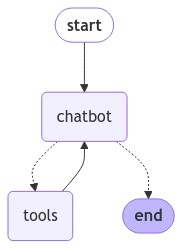

In [57]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [58]:
import re
def sanitize_name(name: str) -> str:
    """Sanitize the name to match the pattern '^[a-zA-Z0-9_-]+$'."""
    return re.sub(r'[^a-zA-Z0-9_-]', '_', name)

In [64]:
import asyncio
from langchain_core.messages import HumanMessage, AIMessage
import time

async def chat_loop():
    config = {"configurable": {"thread_id": "10"}}
    print("可以輸入 'quit', 'exit', 'q' 來結束對話")

    while True:
        user_input = await asyncio.get_event_loop().run_in_executor(None, input, "User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        sanitized_name = sanitize_name("Human") or "Anonymous"  # Fallback if sanitized name is empty
        state = {"messages": [HumanMessage(content=user_input, name=sanitized_name)]}

        print("Assistant: ", end="", flush=True)

        max_retries = 3
        retry_delay = 1

        for attempt in range(max_retries):
          try:
            async for chunk in graph.astream(state, config, stream_mode="values"):
              if "messages" in chunk and chunk["messages"]:
                last_message = chunk["messages"][-1]
                if isinstance(last_message, AIMessage):
                  last_message.name = sanitize_name(last_message.name or "AI") or "AI"
                  print(last_message.content, end="", flush=True)
              elif isinstance(last_message, ToolMessage):
                  print(f"\n[Tool Used: {last_message.name}]")
                  print(f"Tool Call ID: {last_message.tool_call_id}")
                  print(f"Content: {last_message.content}")
                  print("Assistant: ", end="", flush=True)
            break
          except Exception as e:
            if attempt < max_retries - 1:
              print(f"\nAn unexpected error occurred: {str(e)}")
              print(f"\nRetrying in {retry_delay} seconds...")
              await asyncio.sleep(retry_delay)
              retry_delay *= 2
            else:
              print(f"\nMax retries reached. OpenAI API error: {str(e)}")
              break

        print("\n")  # New line after the complete response

In [65]:
# For Jupyter notebooks and IPython environments
import nest_asyncio
nest_asyncio.apply()

# Run the async function
await chat_loop()

可以輸入 'quit', 'exit', 'q' 來結束對話
User: 最近工廠一切安好嗎
Assistant: 根據最近的安全事件記錄，工廠最近沒有報告任何安全問題或事件。如果您對工廠的安全情況有任何擔憂或需要進一步了解，請隨時告訴我。我可以幫助您查看更多相關信息。

User: 有沒有出什麼大包
Assistant: 最近沒有與包裹相關的安全事件報告。如果您有其他問題或需要了解其他類型的安全事件，請告訴我，我可以為您提供相關信息。

User: 很好喔掰掰
Assistant: 感謝您的查詢！如果您有任何其他問題或需要進一步幫助，請隨時與我聯繫。祝您有美好的一天！再見！如果您有任何其他問題或需要進一步幫助，請隨時與我聯繫。祝您有美好的一天！再見！

User: exit
Goodbye!
